<b>Data analysis experiment 1</b>

We first need to create the dataset. It is extracted from a csv that has been generated from the row data. 

We have two ways to discriminate the performance of our subjects : their coherent trials and their audibility measurements. 

First, we want to select participants that have above x% correct answers at coherent trials.

For that we chose a critical score below which the participant is excluded :

In [46]:
score_crit=80

In [ ]:
#Create the dataset we need

import numpy as np
import csv
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#Data recollection
file = open('C:\\Users\\Rodrigue\\Documents\\Rodrigue\\Revcor_fsd\\revcor_fsd\\data\\Donnees_premiere_session.csv')

with open('C:\\Users\\Rodrigue\\Documents\\Rodrigue\\Revcor_fsd\\revcor_fsd\\data\\Donnees_premiere_session.csv') as file:
    file_read = csv.reader(file)
    data = list(file_read)

x=np.linspace(1,7,7)
subjects=np.zeros(99)
weights=np.zeros((99,7))
audibilities=np.zeros((99,7))
coherents=np.zeros(99)
for i in range(1,100):
    subjects[i-1]=data[i][0]
    weights[i-1]=data[i][1:8]
    audibilities[i-1]=data[i][8:15]
    coherents[i-1]=data[i][15]
    
    
#Remove participants with less than x% score at coherents
index_c=np.where(coherents>score_crit)
good_subjects=np.zeros(len(index_c[0]))
good_weights=np.zeros((len(index_c[0]),7))
good_coherents=np.zeros(len(index_c[0]))
good_audibilities=np.zeros((len(index_c[0]),7))
for i in range(len(index_c[0])):
    good_subjects[i]=subjects[index_c[0][i]]
    good_weights[i]=weights[index_c[0][i]]
    good_coherents[i]=coherents[index_c[0][i]]
    good_audibilities[i]=audibilities[index_c[0][i]]

#Sort by increasing coherent score
perf=np.argsort(good_coherents)

good_subjects=np.array(good_subjects)[perf]
good_weights=np.array(good_weights)[perf]
good_coherents=np.array(good_coherents)[perf]
good_audibilities=np.array(good_audibilities)[perf]

We can then reject the participants that show some audibility measurement below a certain attenuation threshold.

In [47]:
audi_min=-20

In [49]:
#Sort via Audibility
#We want to cut participants which have some attenuations under x dB

index_a=np.where(np.all(good_audibilities<audi_min, axis=1))
very_good_subjects=np.zeros(len(index_a[0]))
very_good_weights=np.zeros((len(index_a[0]),7))
very_good_coherents=np.zeros(len(index_a[0]))
very_good_audibilities=np.zeros((len(index_a[0]),7))
for i in range(len(index_a[0])):
    very_good_subjects[i]=good_subjects[index_a[0][i]]
    very_good_weights[i]=good_weights[index_a[0][i]]
    very_good_coherents[i]=good_coherents[index_a[0][i]]
    very_good_audibilities[i]=good_audibilities[index_a[0][i]]

Here we can plot the weights of the remaining participants for a first visualisation.

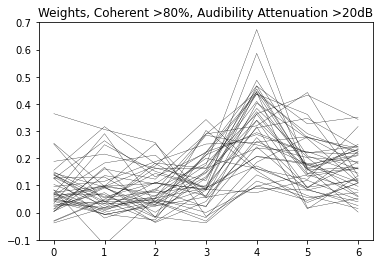

In [50]:
#Plot the weights

plt.title(f'Weights, Coherent >{score_crit}%, Audibility Attenuation >{-audi_min}dB')
plt.ylim(-0.1,0.7)
for i in range(len(very_good_weights)):
    plt.plot(very_good_weights[i], '-k', linewidth=0.3)
plt.show()

One way to analyse the data is to try to reduce the dimensionality of our weights distribution, for instance through PCA. Here, we compute n dimensions, and we give their explained variance ratio. 

In [52]:
n_dimensions=2

Explained variance : [0.36254921 0.18557316]


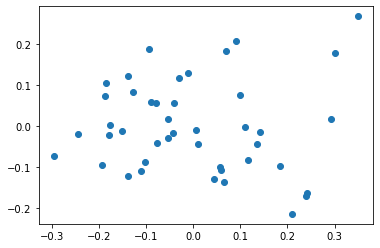

In [53]:
#PCA

from sklearn import decomposition

pca = decomposition.PCA(n_components=n_dimensions)
PrincipalComponents=pca.fit_transform(very_good_weights)


plt.scatter(PrincipalComponents[:,0],PrincipalComponents[:,1])
print('Explained variance :', pca.explained_variance_ratio_)

plt.show()

Now what we would want is to seperate the subjects in groups of similar weights profile. That can be done through clustering algorithm. Here we propose to explore two of them : the standard k-means algorithm, or an agglomerative hierarchical algorithm. 

In [54]:
n_clusters=4
cluster_type = 'k-means'
#Choices are k-means or agglo

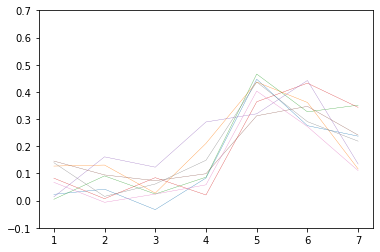

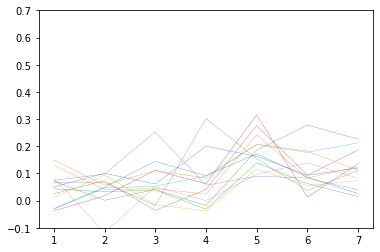

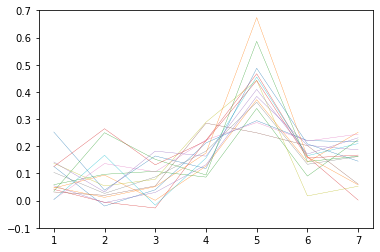

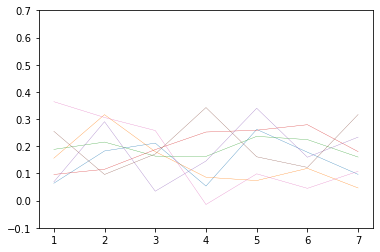

In [58]:
#Cluster algorithm

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#cluster algorithm type
if cluster_type=='k-means':
    model = KMeans(n_clusters=n_clusters)
    model.fit(very_good_weights)
    yhat = model.predict(very_good_weights)
elif cluster_type=='agglo':
    model = AgglomerativeClustering(n_clusters=n_clusters)
    yhat = model.fit_predict(weights)
else:
    print('not a correct cluster type')

# retrieve unique clusters
clusters = np.unique(yhat)

# create arrays and plot for each clusters
for cluster in clusters:
    # get row indexes for samples with this cluster
    plt.figure()
    row_ix = np.where(yhat == cluster)
    weights_cluster=np.zeros((len(row_ix[0]),7))
    subjects_cluster=np.zeros(len(row_ix[0]))
    coherents_cluster=np.zeros(len(row_ix[0]))
    audibilities_cluster=np.zeros((len(row_ix[0]),7))
    for k in range(len(row_ix[0])):
        weights_cluster[k]=very_good_weights[row_ix[0][k]]
        subjects_cluster[k]=very_good_subjects[row_ix[0][k]]
        coherents_cluster[k]=very_good_coherents[row_ix[0][k]]
        audibilities_cluster[k]=very_good_audibilities[row_ix[0][k]]
        
        plt.ylim(-0.1,0.7)
        plt.plot(x,weights_cluster[k],'-', linewidth=0.3)
# show the plot
plt.show()